In [1]:
# General modules
import sys
import os
import session_info
import warnings
from pyprojroot.here import here
import glob
import pandas as pd
import numpy as np
import session_info
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import pickle

# Specific modules
import scanpy as sc
import anndata as an
from matplotlib.backends.backend_pdf import PdfPages


# Setting some parameters
warnings.filterwarnings("ignore")
sys.path.insert(1, str(here('bin')))

# Import custom functions
from customPythonFunctions import generateID2SymbolDF
from customPalette import *

print("Main directory path: {}".format(here()))

#plt.style.use(['science','nature','no-latex'])
dpi_fig_save = 300
sc.set_figure_params(dpi=100, dpi_save=dpi_fig_save, vector_friendly=True)

Main directory path: /scratch_isilon/groups/singlecell/shared/projects/Inflammation-PBMCs-Atlas


**Load data**

In [2]:
adata_path = here("02_fromCellLineages_to_CellTypes/INFLAMMATION_main_annotated_LowQFilt.h5ad")
adata = sc.read_h5ad(adata_path)
adata

AnnData object with n_obs × n_vars = 4435922 × 22838
    obs: 'studyID', 'libraryID', 'sampleID', 'chemistry', 'disease', 'sex', 'binned_age', 'Level1', 'Level2'
    var: 'hgnc_id', 'symbol', 'locus_group', 'HUGO_status'

In [3]:
adata.obs['Level1'] = pd.Categorical(adata.obs['Level1'], categories=annotation_Level1_LowQFilt_sortednames)
adata.obs['Level2'] = pd.Categorical(adata.obs['Level2'], categories=annotation_Level2_LowQFilt_sortednames)

In [4]:
#[f for f in geneMarkers_level1_list if f not in adata.var["symbol"].tolist()]

# Dotplot Level 1

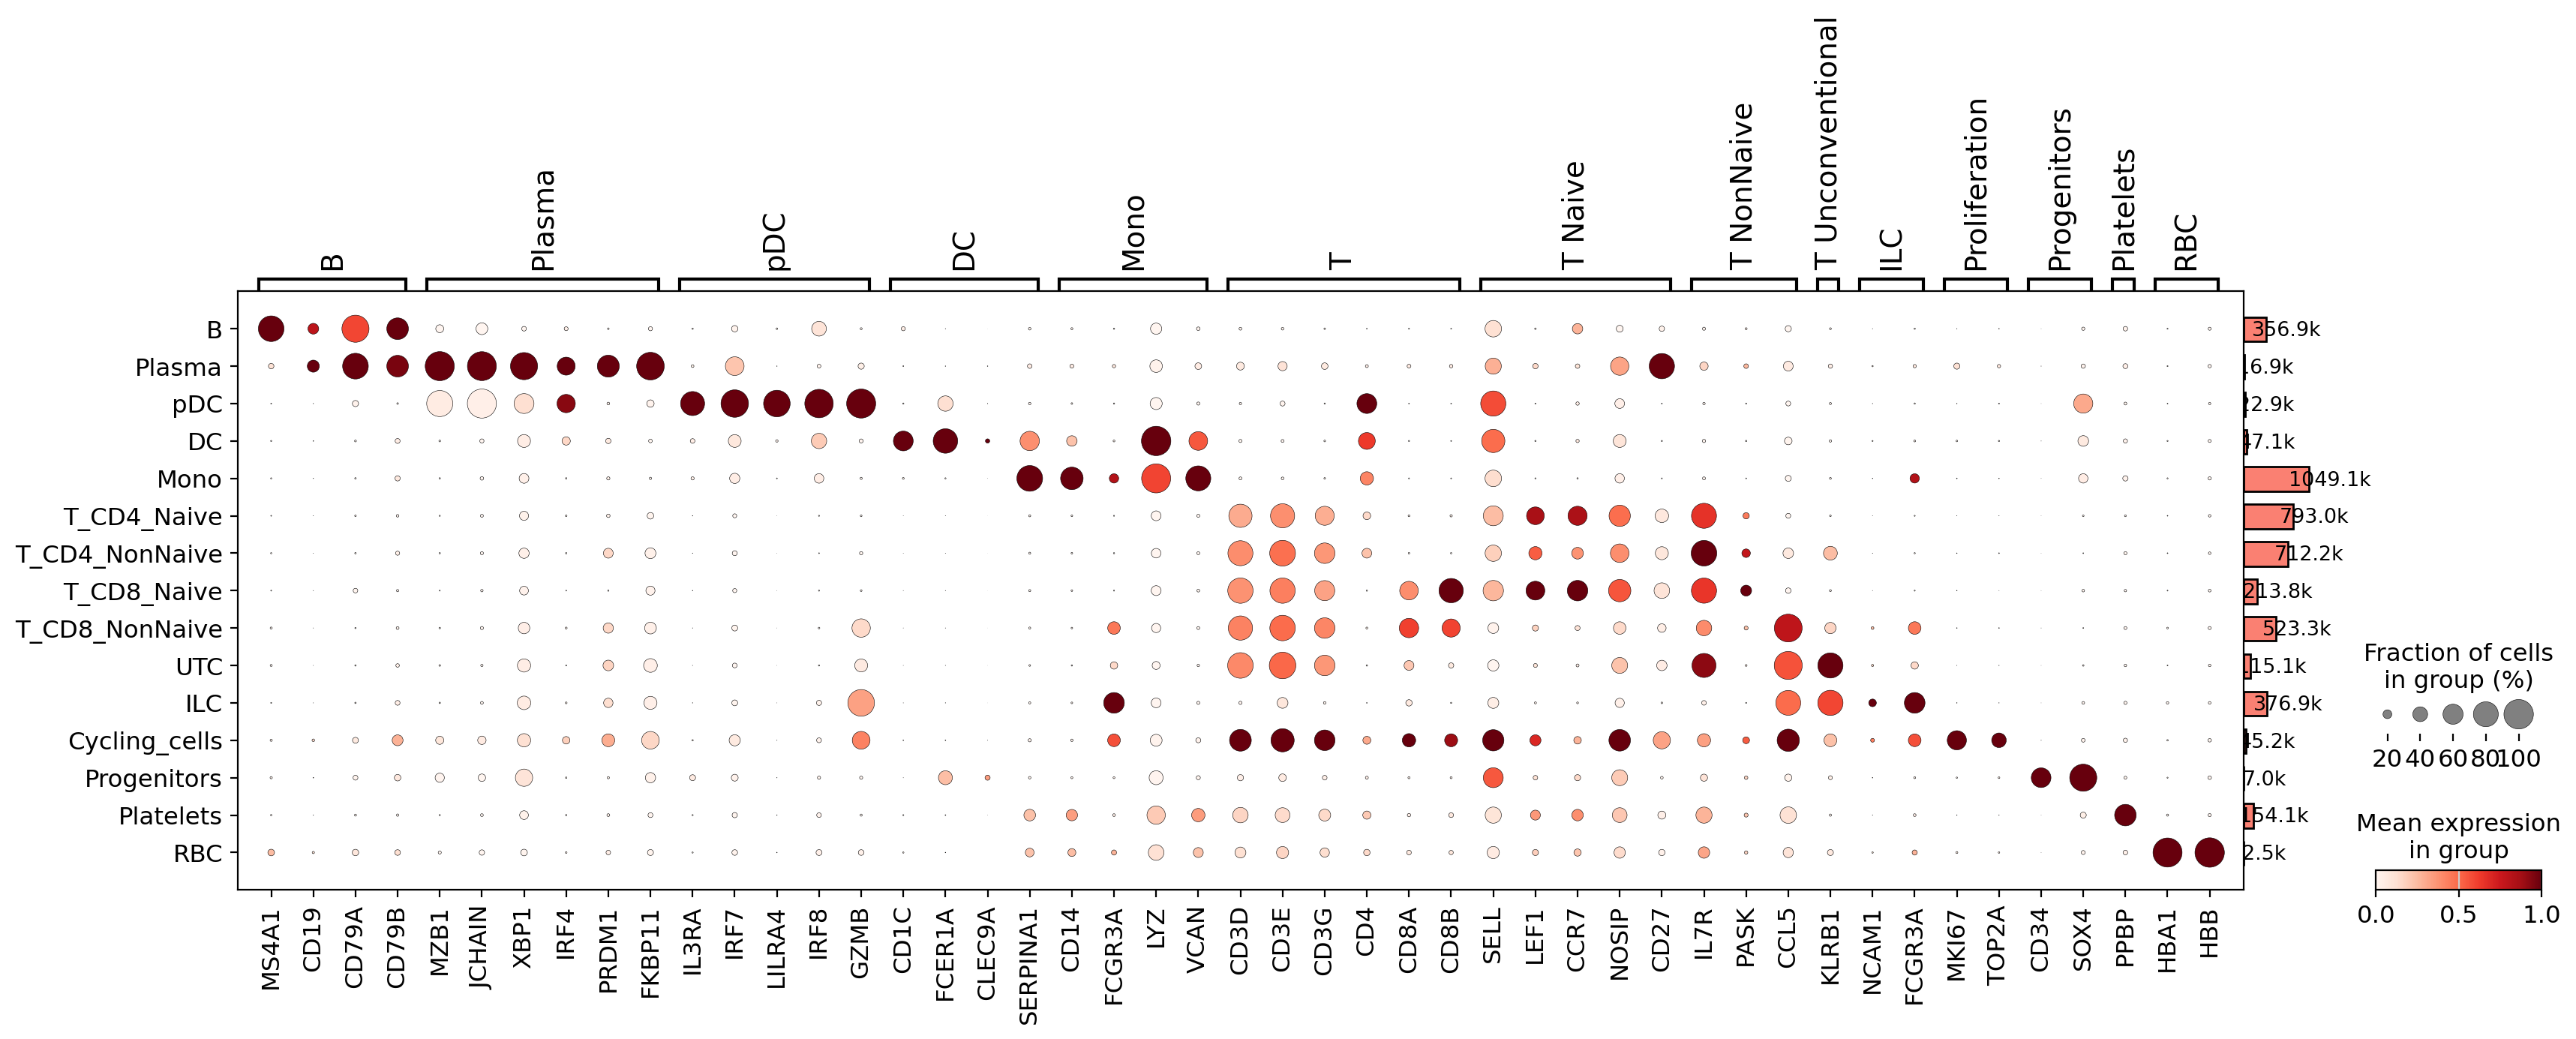

In [5]:
# Gene preparation
geneMarkers_level1_ENSB = {}
for cell_type, symbols in geneMarkers_level1.items():
    geneMarkers_level1_ENSB[cell_type] = generateID2SymbolDF(varDF = adata.var, symbolList = symbols, 
                                  ID_col = 'index', symbols_col = 'symbol', HUGOstatus_col = 'HUGO_status', behaviour = 'official')["gene_id"]

geneMarkers_level1_list = list(gene for gene_list in geneMarkers_level1.values() for gene in gene_list)


# Dotplot
dotplot = sc.pl.dotplot(adata, var_names = geneMarkers_level1_ENSB, groupby="Level1", standard_scale='var',
                    use_raw = False, dendrogram=False, show=False, return_fig=True)

dotplot.add_totals()
dotplot.get_axes()['mainplot_ax'].set_xticklabels(geneMarkers_level1_list)

plt.savefig(here('02_cell_annotation/03_characterizing_CellTypes/figures/INFLAMMATION_main_annotated_LowQFilt_Dotplot_Level1.pdf'), bbox_inches='tight', pad_inches=0, dpi=dpi_fig_save)

# Dotplot Level 2

In [6]:
# for cell type
#print([f for f in [gene for markers in geneMarkers_level2[celltype].values() for gene in markers] if f not in adata_sub.var["symbol"].tolist()])

B
Plasma
DC
Mono
T_CD4_NonNaive
T_CD8_NonNaive
UTC
ILC
Progenitors


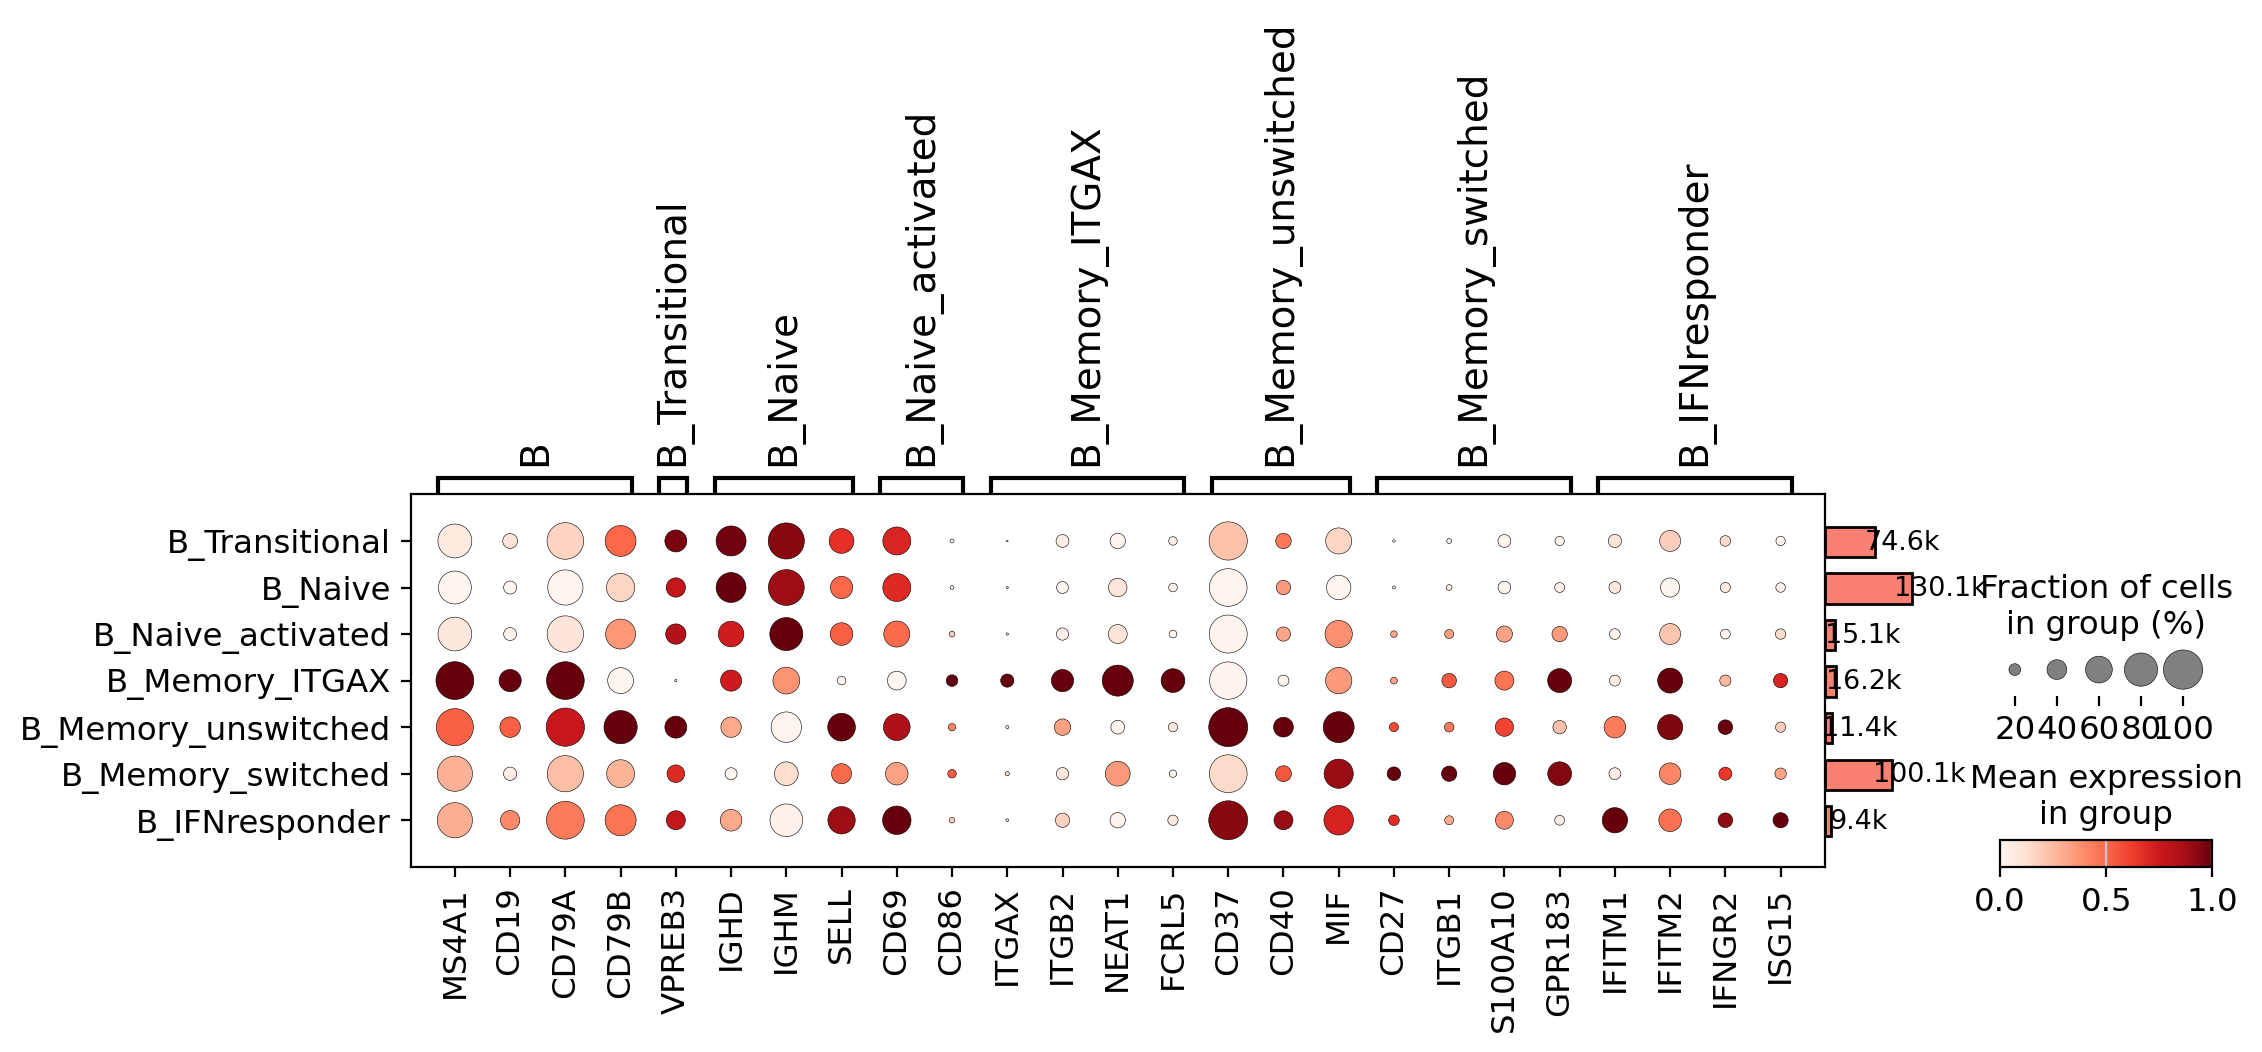

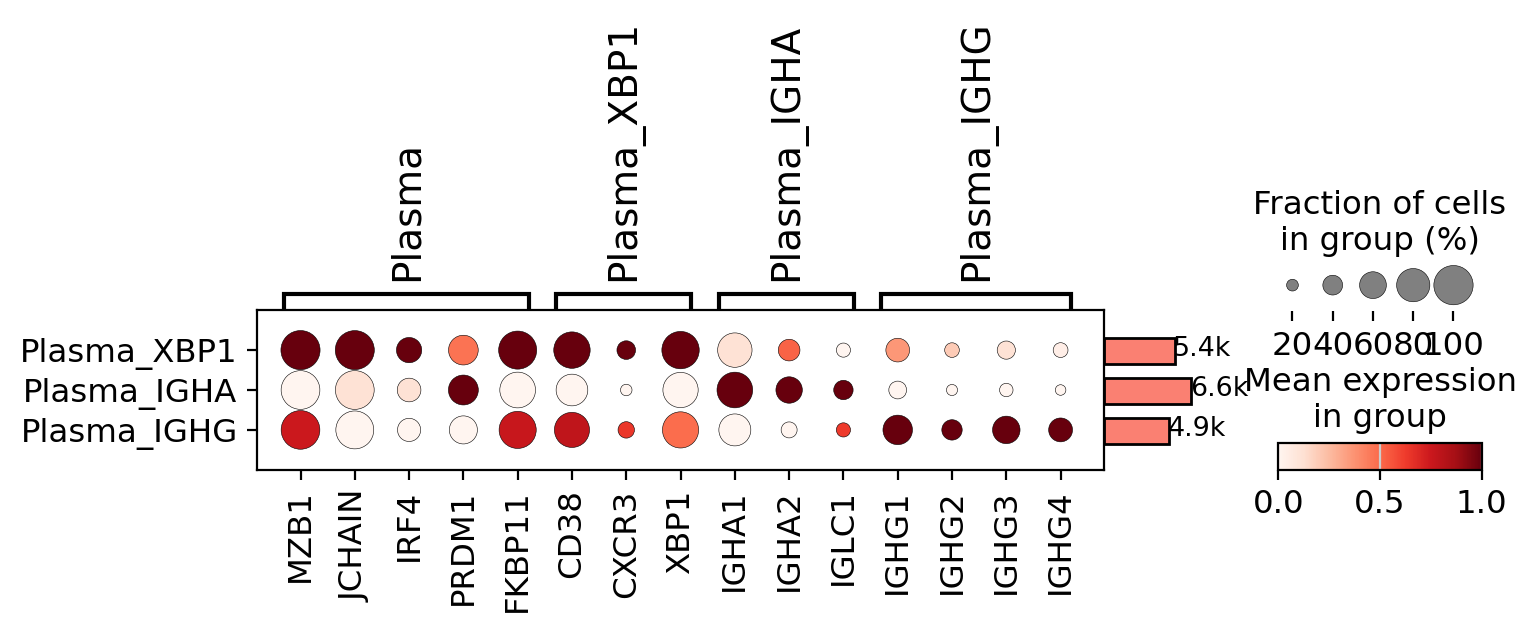

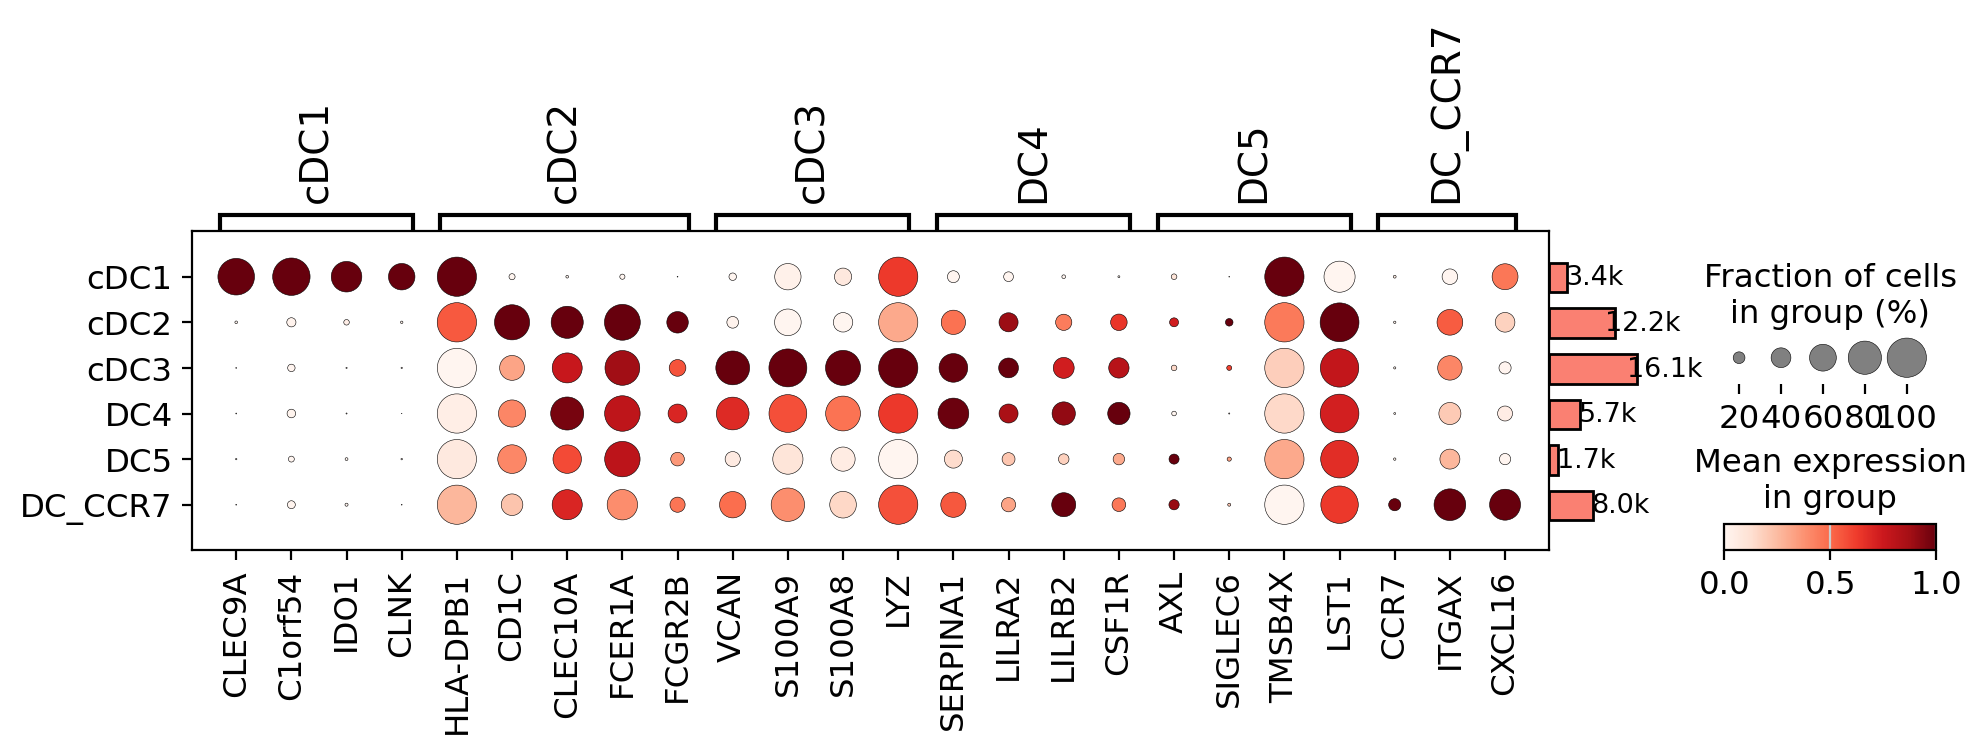

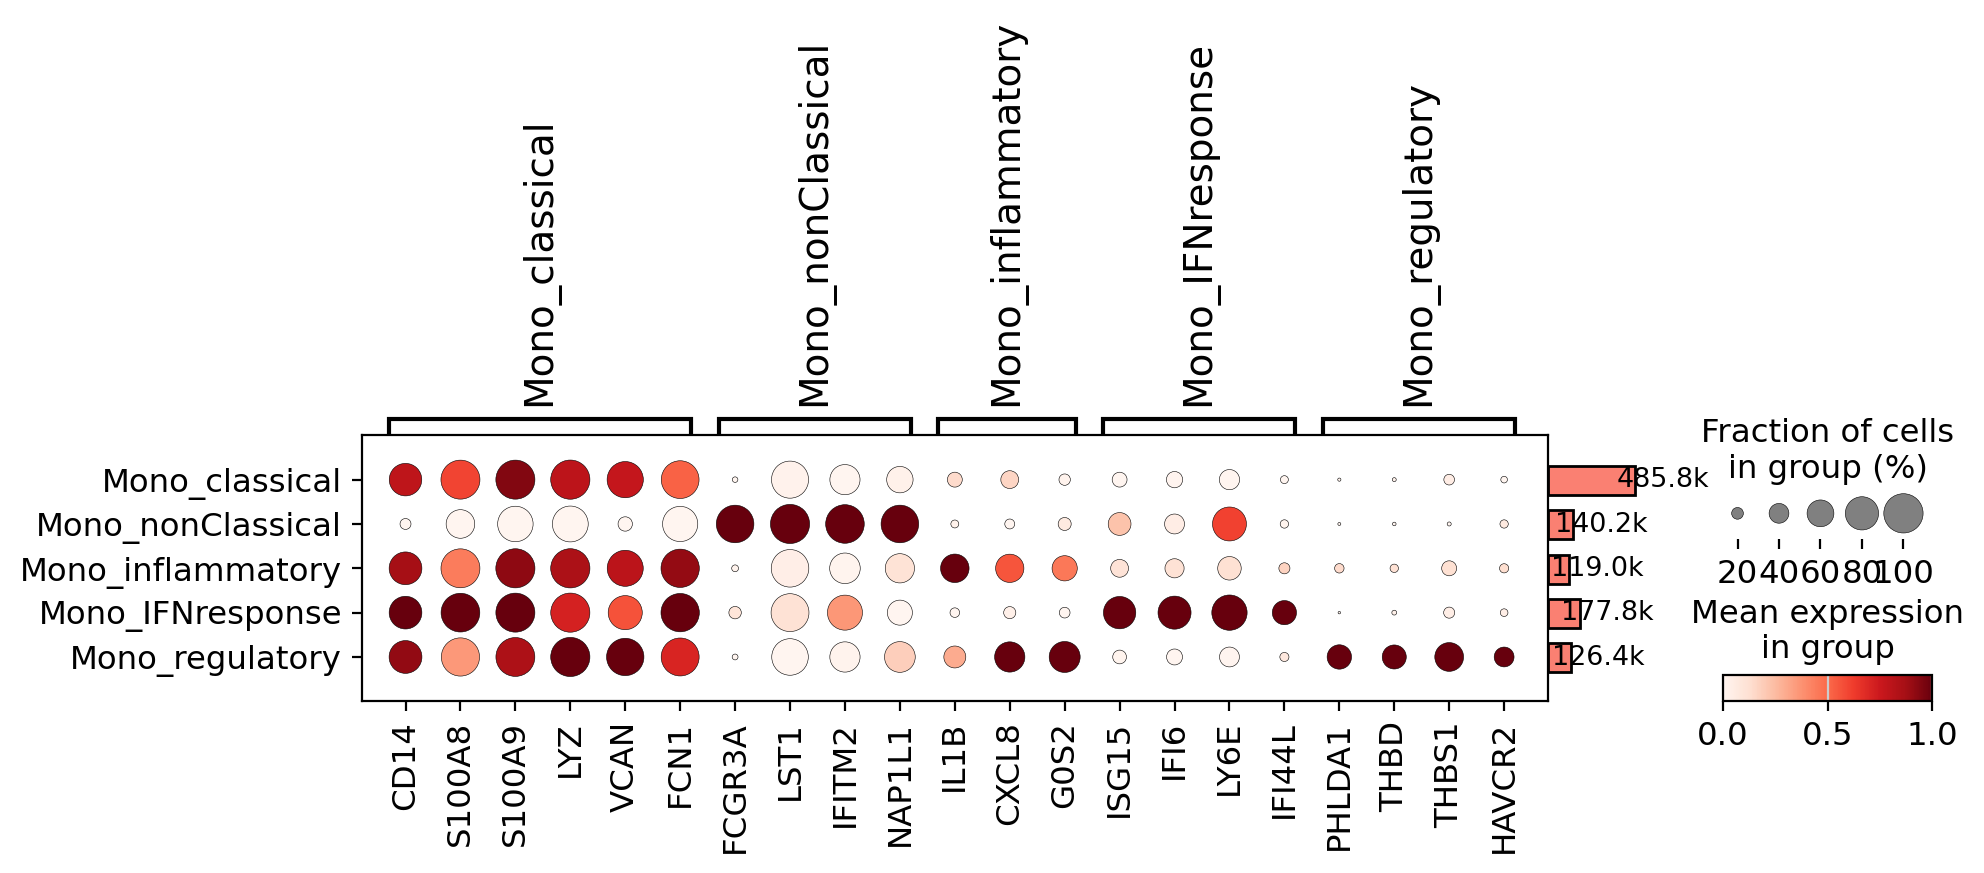

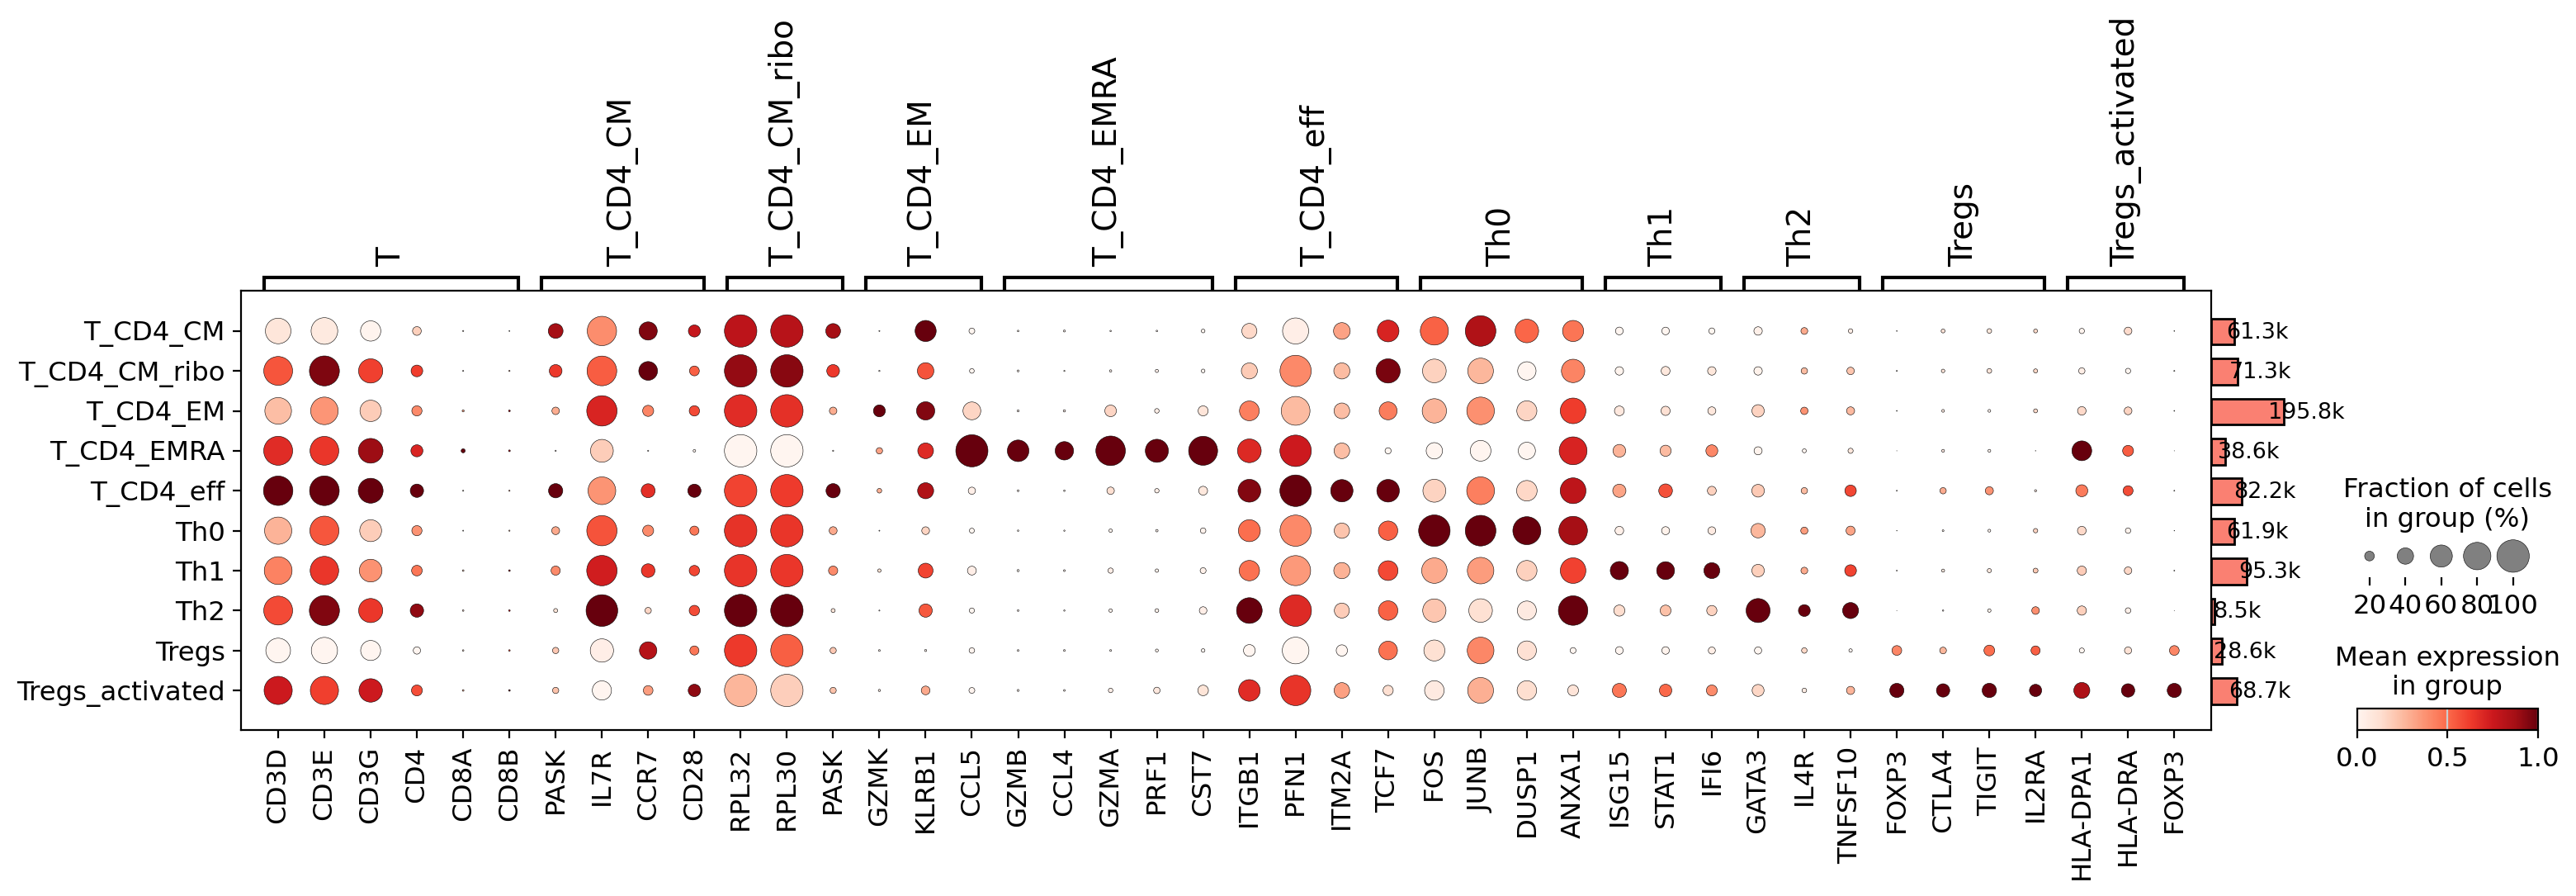

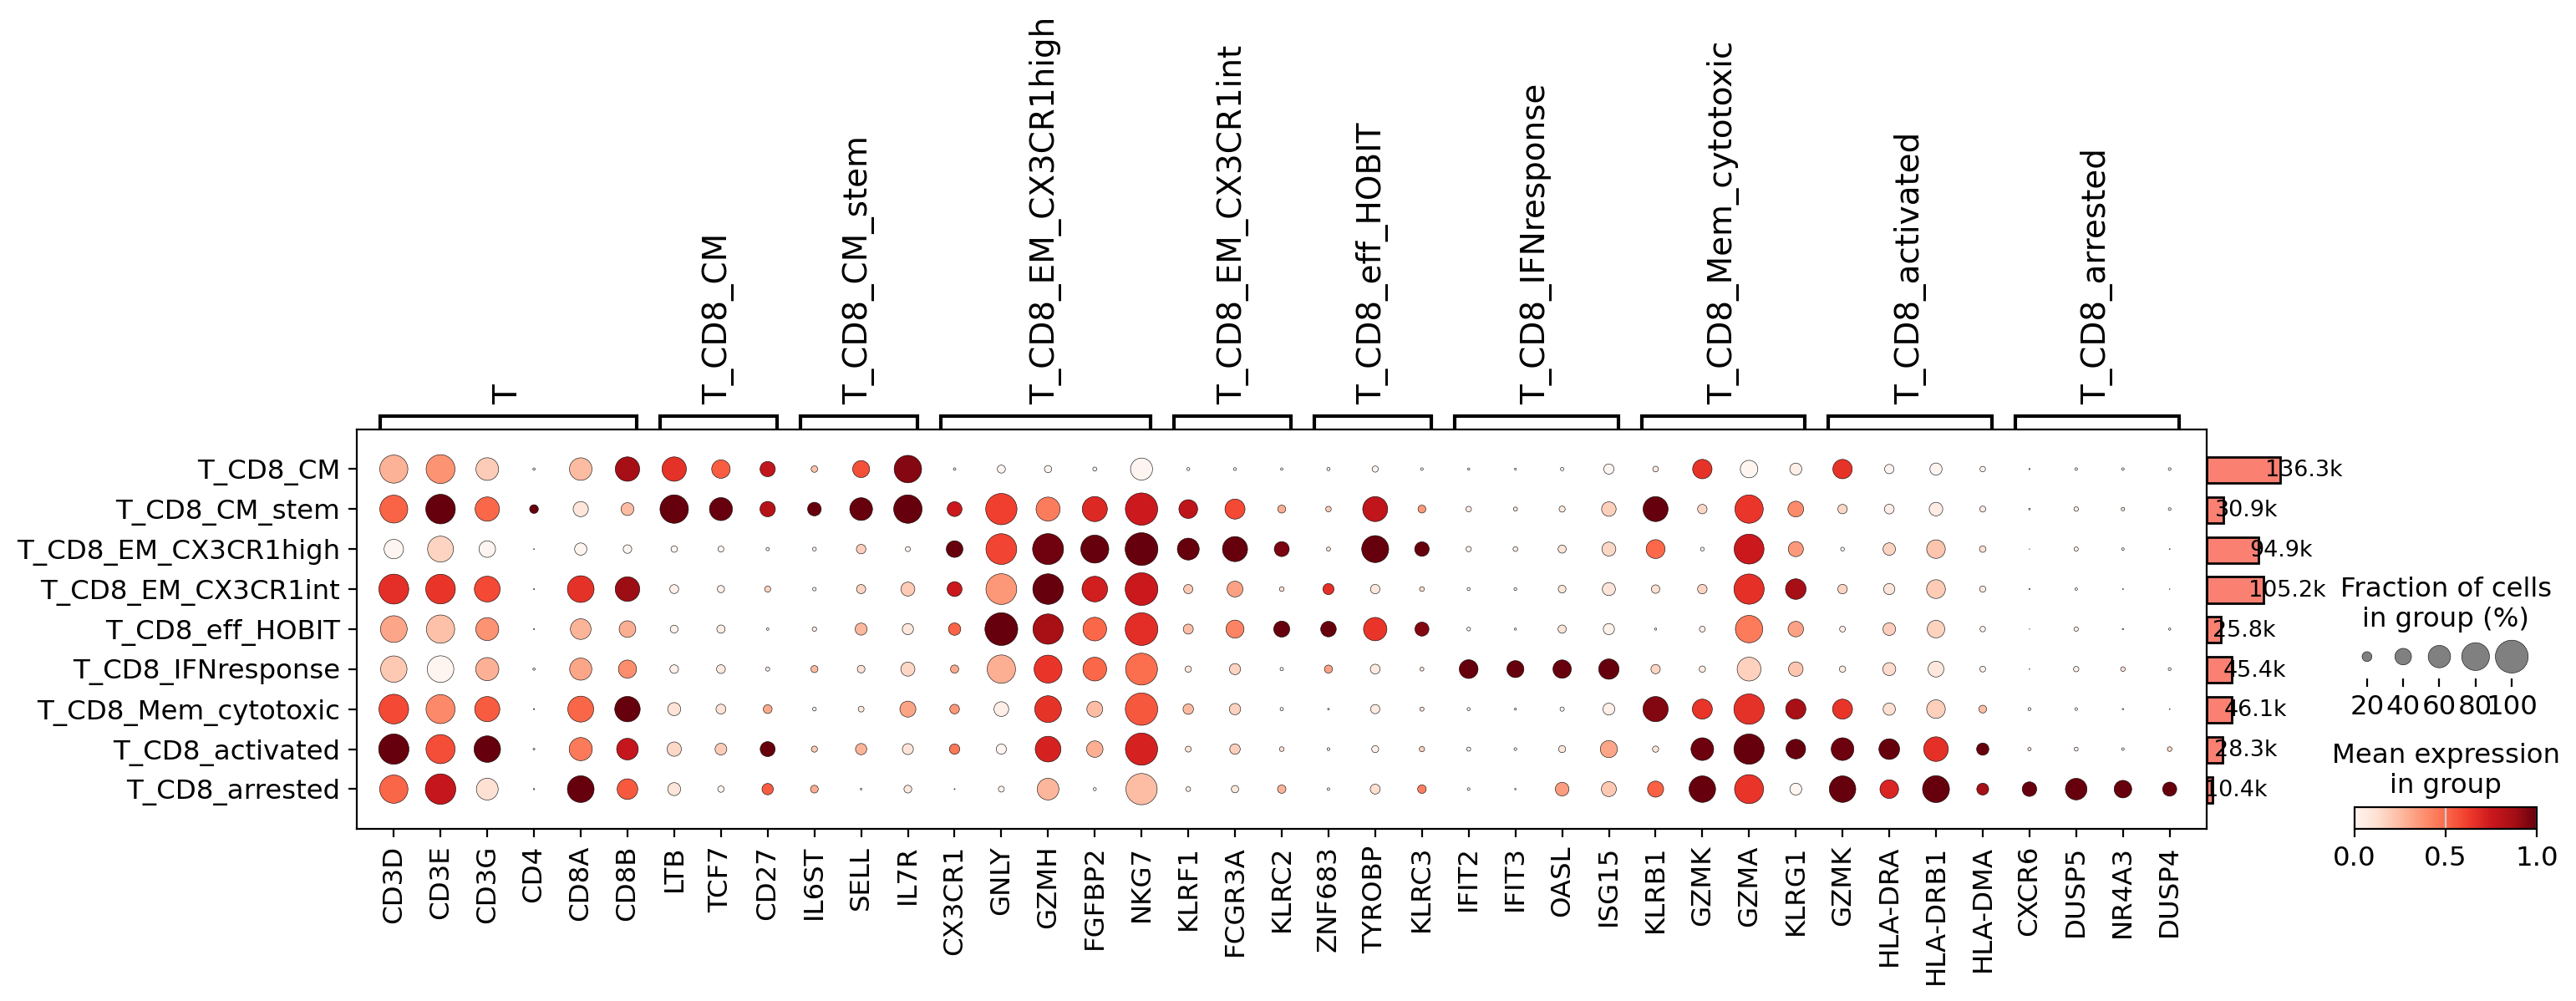

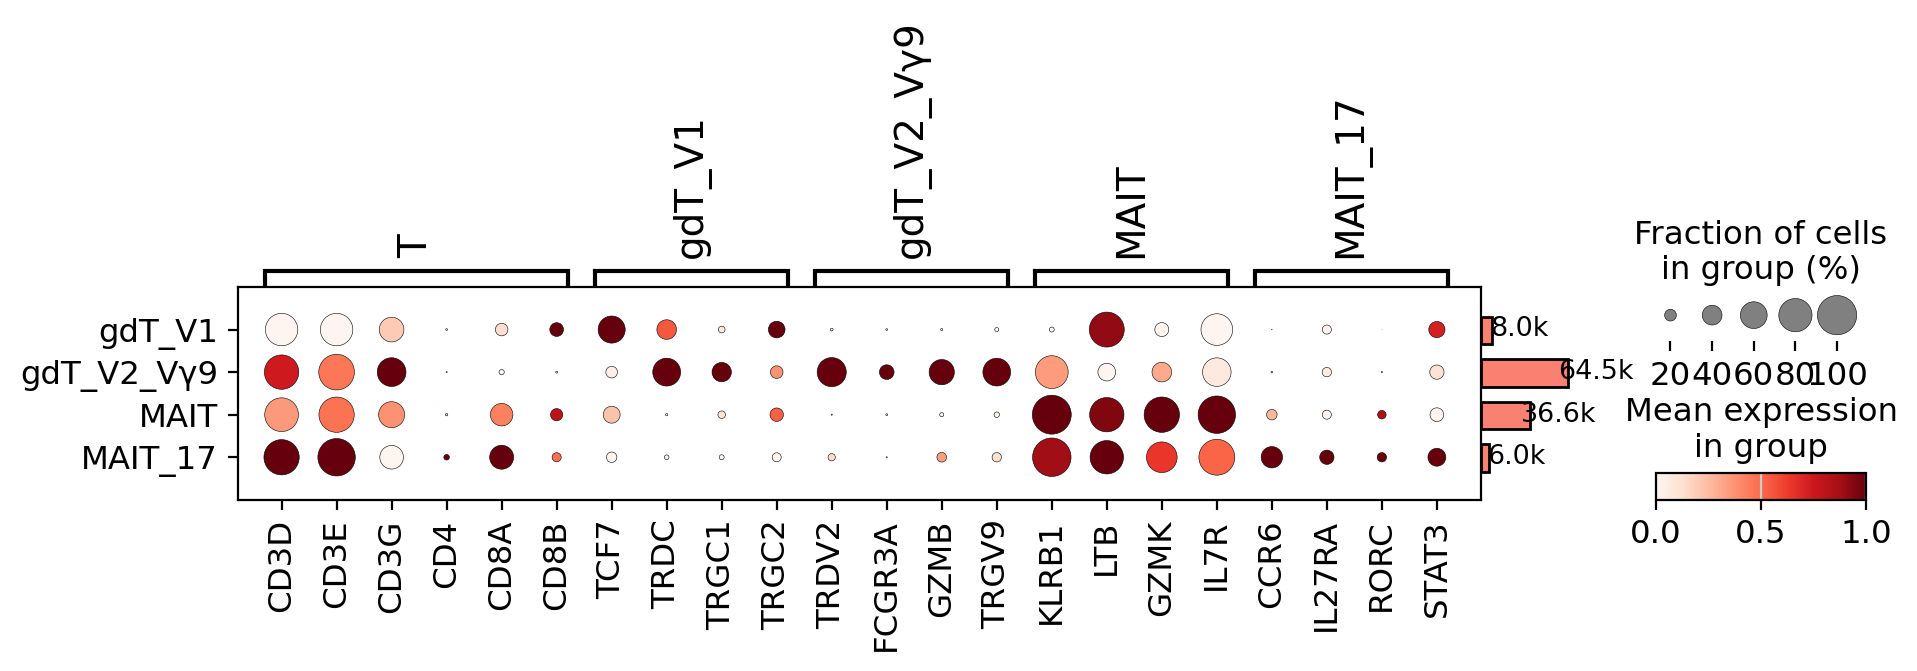

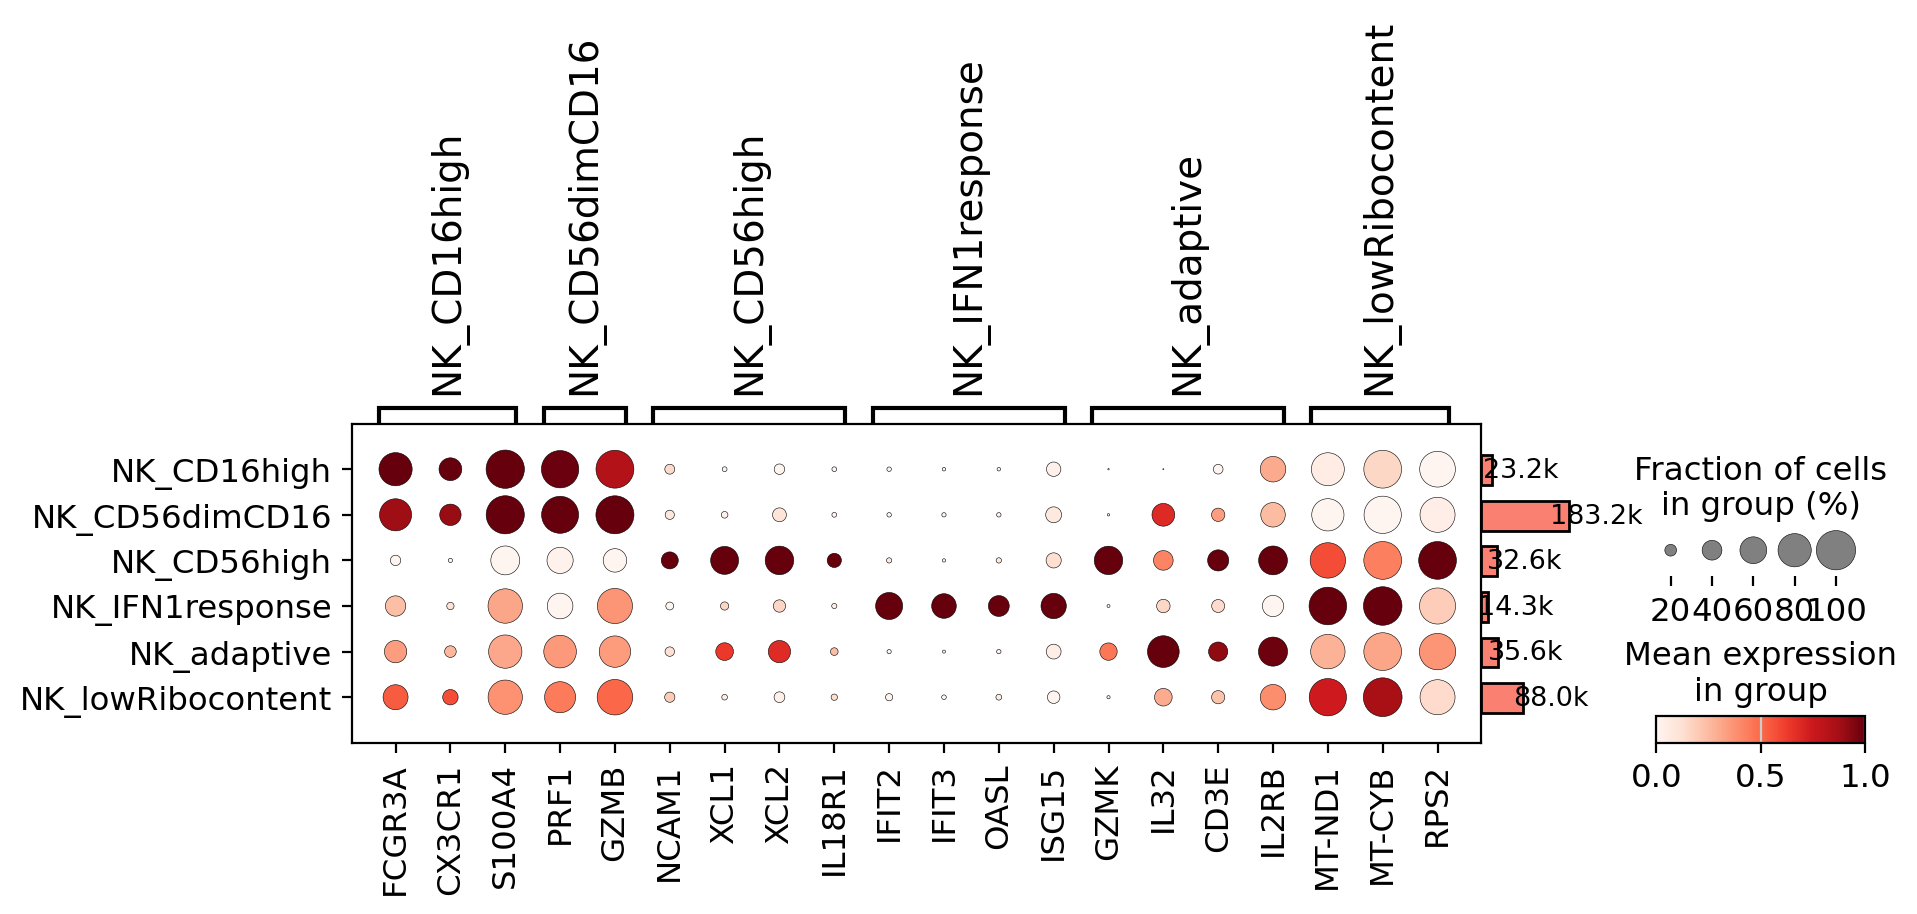

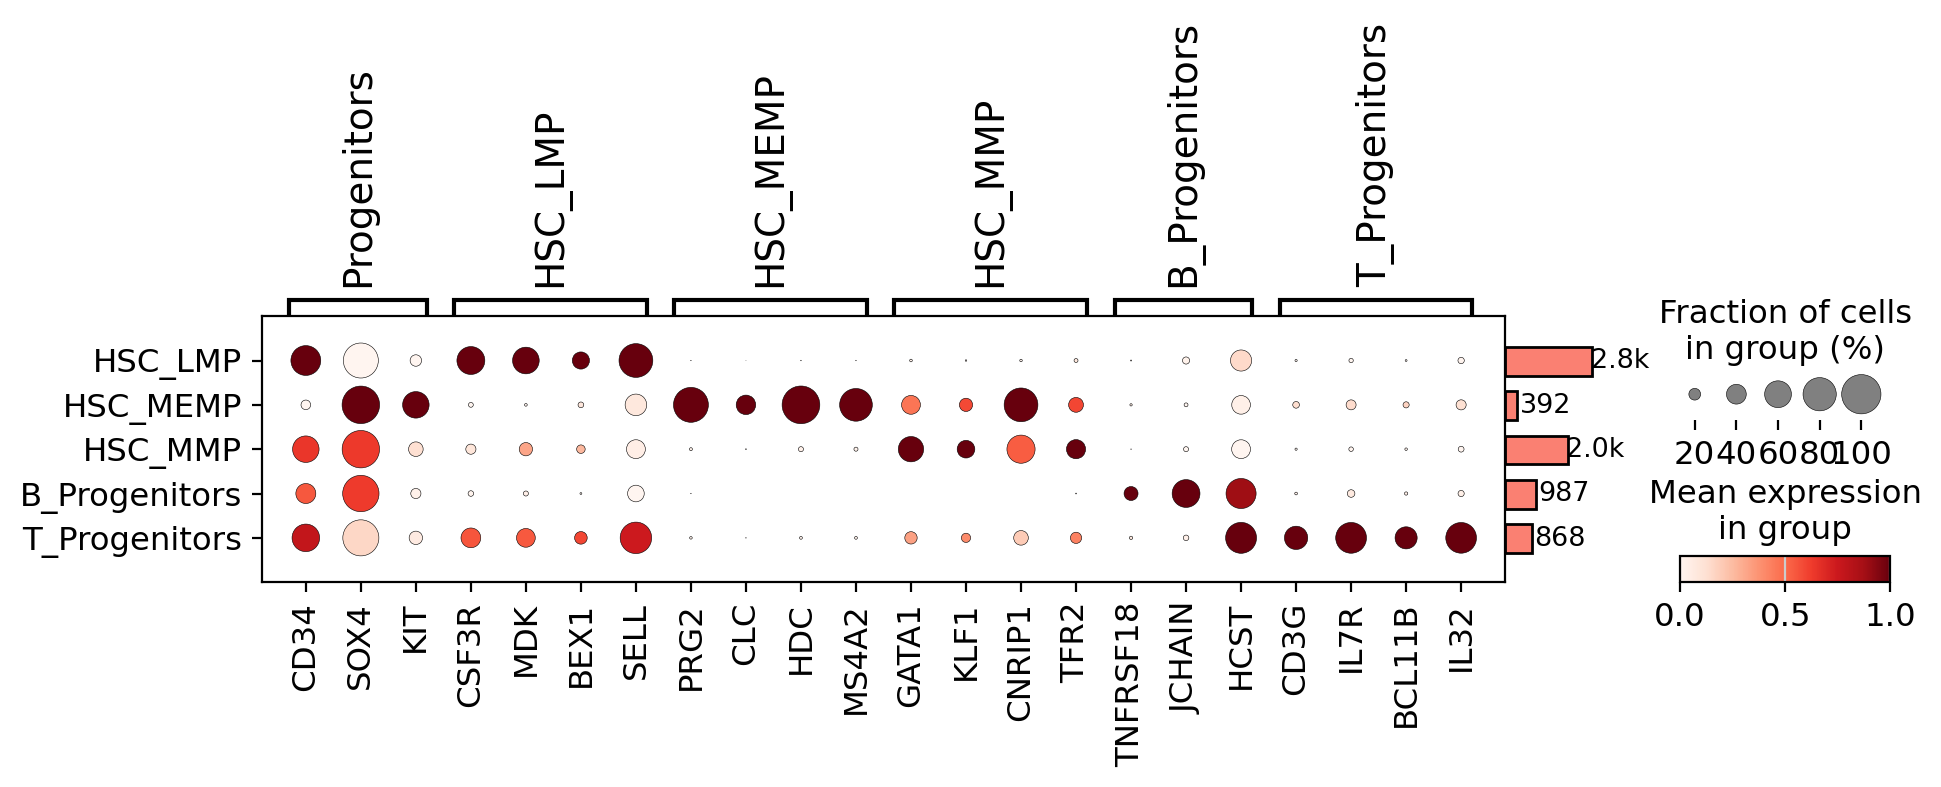

In [7]:
for celltype in ["B", "Plasma", "DC", "Mono", "T_CD4_NonNaive", "T_CD8_NonNaive", "UTC", "ILC", "Progenitors", "Cycling_cells"]:

    print(celltype)
    adata_sub = adata[adata.obs["Level1"] == celltype]

    # Gene preparation
    geneMarkers_level2_ENSB = {}
    for cell_type, symbols in geneMarkers_level2[celltype].items():
        geneMarkers_level2_ENSB[cell_type] = generateID2SymbolDF(varDF = adata_sub.var, symbolList = symbols, 
                                      ID_col = 'index', symbols_col = 'symbol', HUGOstatus_col = 'HUGO_status', behaviour = 'official')["gene_id"]
    
    geneMarkers_level2_list = list(gene for gene_list in geneMarkers_level2[celltype].values() for gene in gene_list)
    
    # Dotplot
    dotplot = sc.pl.dotplot(adata_sub, var_names = geneMarkers_level2_ENSB, groupby="Level2", standard_scale='var',
                        use_raw = False, dendrogram=False, show=False, return_fig=True)
    
    dotplot.add_totals()
    dotplot.get_axes()['mainplot_ax'].set_xticklabels(geneMarkers_level2_list)
    
    plt.savefig(here(f'02_cell_annotation/03_characterizing_CellTypes/figures/INFLAMMATION_main_annotated_LowQFilt_Dotplot_{celltype}_Level2.pdf'), bbox_inches='tight', pad_inches=0, dpi=dpi_fig_save)

In [8]:
session_info.show()